In [1]:
import tensorflow as tf
import numpy as np
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input, decode_predictions
from keras.applications.inception_v3 import InceptionV3
from keras.applications.densenet import DenseNet121
from keras.applications.vgg16 import VGG16
from keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
paths,paths2 =[],[]
directory_path = r'/content/drive/MyDrive/ai data/DLP MY IMPLEMENTATION/Data/train_only'
directory_path2 = r'/content/drive/MyDrive/ai data/DLP MY IMPLEMENTATION/Data/val_only'#for val data
for root, directories, files in os.walk(directory_path):
    for directory in directories:
        directory_full_path = os.path.join(root, directory)
        paths.append(directory_full_path)
for root, directories, files in os.walk(directory_path2):
    for directory in directories:
        directory_full_path = os.path.join(root, directory)
        paths2.append(directory_full_path)
print(paths)
print(paths2)

['/content/drive/MyDrive/ai data/DLP MY IMPLEMENTATION/Data/train_only/Bus', '/content/drive/MyDrive/ai data/DLP MY IMPLEMENTATION/Data/train_only/Bicycle', '/content/drive/MyDrive/ai data/DLP MY IMPLEMENTATION/Data/train_only/Car', '/content/drive/MyDrive/ai data/DLP MY IMPLEMENTATION/Data/train_only/Chair', '/content/drive/MyDrive/ai data/DLP MY IMPLEMENTATION/Data/train_only/Cat', '/content/drive/MyDrive/ai data/DLP MY IMPLEMENTATION/Data/train_only/Bottle', '/content/drive/MyDrive/ai data/DLP MY IMPLEMENTATION/Data/train_only/Bird', '/content/drive/MyDrive/ai data/DLP MY IMPLEMENTATION/Data/train_only/Aeroplane', '/content/drive/MyDrive/ai data/DLP MY IMPLEMENTATION/Data/train_only/Cow', '/content/drive/MyDrive/ai data/DLP MY IMPLEMENTATION/Data/train_only/Boat', '/content/drive/MyDrive/ai data/DLP MY IMPLEMENTATION/Data/train_only/Diningtable', '/content/drive/MyDrive/ai data/DLP MY IMPLEMENTATION/Data/train_only/Sofa', '/content/drive/MyDrive/ai data/DLP MY IMPLEMENTATION/Data/tr

In [4]:
def drawSoloPic(path,num):
    rows = 4
    cols = 4
    fig = plt.gcf()
    fig.set_size_inches(cols * 4, rows * 4)
    sp = plt.subplot(cols, rows, 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    image_count = 0
    for filename in os.listdir(path):
      if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        image_count += 1
        if image_count == num:
            image_path = os.path.join(path, filename)
            print(os.path.basename(os.path.dirname(path+"/"+filename)))
    img = mpimg.imread(image_path)
    plt.imshow(img)

    plt.show()



Bus


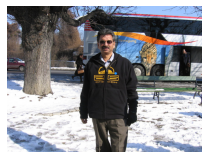

Cat


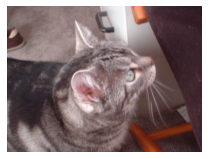

Boat


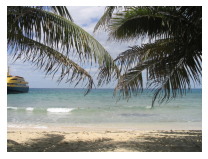

Train


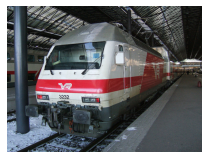

In [5]:
drawSoloPic(paths[0],1)
drawSoloPic(paths[4],1)
drawSoloPic(paths[9],1)
drawSoloPic(paths[15],1)

In [6]:
def showNumPics():
  names,count = [],[]
  for i in range(0,len(paths)):
    names.append(os.path.basename(paths[i]))
    count.append(len(os.listdir(paths[i])))
  return names,count

def showNumPics2():#for val data
  names,count = [],[]
  for i in range(0,len(paths2)):
    names.append(os.path.basename(paths2[i]))
    count.append(len(os.listdir(paths2[i])))
  return names,count
    # print("The Number Of " + os.path.basename(paths[i]) + " Pictures =",len(os.listdir(paths[i])))

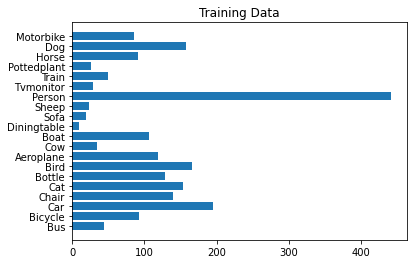

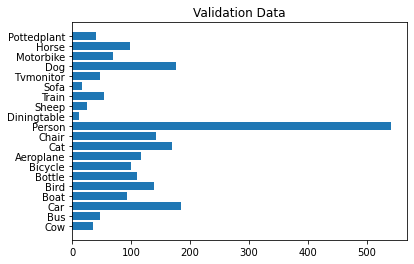

In [7]:
names,count = showNumPics()
plt.barh(names,count)
plt.title('Training Data')
plt.show()

names2,count2 = showNumPics2()
plt.barh(names2,count2)
plt.title('Validation Data')
plt.show()

In [8]:
img_size = (224, 224)

datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

valid_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

b_size=128
train_data = datagen.flow_from_directory(
    directory_path,
    target_size=img_size,
    batch_size=b_size,
    class_mode='categorical',
)

valid_data = valid_datagen.flow_from_directory(
    directory_path2,
    target_size=img_size,
    batch_size=b_size,
    class_mode='categorical',
)

Found 2111 images belonging to 20 classes.
Found 2221 images belonging to 20 classes.


In [9]:
print(len(paths))
print(len(paths2))

20
20


# **ResNet50**

In [10]:
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in resnet_model.layers:
    layer.trainable = False

num_classes = len(paths)

x = resnet_model.output
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense (256, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense (128, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense (64, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
output = Dense(num_classes, activation='softmax')(x)

model1 = Model(inputs=resnet_model.input, outputs=output)

model1.summary()

94765736/94765736 [==============================] - 5s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                             

In [ ]:
model1.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

resnet_history = model1.fit(train_data,epochs=20,validation_data = valid_data)

In [ ]:
train_loss = resnet_history.history['loss']
val_loss = resnet_history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, marker="o", label='Training loss')
plt.plot(epochs, val_loss, marker="o", color='orange', label='Validation loss')
plt.title('Training and validation loss ResNet50')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **VGG16**

In [ ]:
vgg16_model = VGG16(weights='imagenet',include_top=False, input_shape=(224, 224, 3))

for layer in vgg16_model.layers:
    layer.trainable = False

x = vgg16_model.output
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense (256, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense (128, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense (64, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
output = Dense(num_classes, activation='softmax')(x)

model2 = Model(inputs=vgg16_model.input, outputs=output)

model2.summary()

In [ ]:
model2.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

vgg16_history = model2.fit(train_data,epochs=20,validation_data = valid_data)

In [ ]:
train_loss = vgg16_history.history['loss']
val_loss = vgg16_history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, marker="o", label='Training loss')
plt.plot(epochs, val_loss, marker="o", color='orange', label='Validation loss')
plt.title('Training and validation loss VGG16')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **InceptionV3**

In [ ]:
inceptionV3_model = InceptionV3(weights='imagenet',include_top=False, input_shape=(224, 224, 3))

for layer in inceptionV3_model.layers:
    layer.trainable = False

x = inceptionV3_model.output
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense (256, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense (128, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense (64, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
output = Dense(num_classes, activation='softmax')(x)

model3 = Model(inputs=inceptionV3_model.input, outputs=output)

model3.summary()

In [ ]:
model3.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

inceptionV3_history = model3.fit(train_data,epochs=20, validation_data = valid_data)

In [ ]:
train_loss = inceptionV3_history.history['loss']
val_loss = inceptionV3_history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, marker="o", label='Training loss')
plt.plot(epochs, val_loss, marker="o", color='orange', label='Validation loss')
plt.title('Training and validation loss InceptionV3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **DenseNet121**

In [ ]:
densenet121_model = DenseNet121(include_top=False, weights="imagenet",input_shape=(224, 224, 3))

for layer in densenet121_model.layers:
    layer.trainable = False

x = densenet121_model.output
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense (256, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense (128, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense (64, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
output = Dense(num_classes, activation='softmax')(x)

model4 = Model(inputs=densenet121_model.input, outputs=output)

model4.summary()

In [ ]:
model4.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

densenet121_history = model4.fit(train_data,epochs=20, validation_data = valid_data)

In [ ]:
train_loss = densenet121_history.history['loss']
val_loss = densenet121_history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, marker="o", label='Training loss')
plt.plot(epochs, val_loss, marker="o", color='orange', label='Validation loss')
plt.title('Training and validation loss DenseNet121')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **MobileNetV2**

In [ ]:
mobilenetv2_model = MobileNetV2(include_top=False, weights="imagenet",input_shape=(224, 224, 3))

for layer in mobilenetv2_model.layers:
    layer.trainable = False

x = mobilenetv2_model.output
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense (256, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense (128, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense (64, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
output = Dense(num_classes, activation='softmax')(x)

model5 = Model(inputs=mobilenetv2_model.input, outputs=output)

model5.summary()

In [ ]:
model5.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

mobilenetv2_history = model5.fit(train_data,epochs=20, validation_data = valid_data)

In [ ]:
train_loss = mobilenetv2_history.history['loss']
val_loss = mobilenetv2_history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, marker="o", label='Training loss')
plt.plot(epochs, val_loss, marker="o", color='orange', label='Validation loss')
plt.title('Training and validation loss MobileNetV2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **10 Pictures on Each Model**

In [ ]:
classes = [0,4,7,9,10,11,12,16,18,19]
img_size = (224, 224)

models = [model1,model2,model3,model4,model5]
model_names = ["ResNet50",'VGG16','InceptionV3','DenseNet121','MobileNetV2']
for i,path in enumerate(paths2):
  image_count = 0
  if i in classes:
    for filename in os.listdir(path):
          if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
            image_count += 1
            if image_count == 5:#5th image for classes mentioned above
                image_path = os.path.join(path, filename)
                img = image.load_img(image_path, target_size=img_size)

                im = image.img_to_array(img)
                im = np.expand_dims(im, axis=0)
                im = preprocess_input(im)
                for model in models:
                  probs = model.predict(im)
                  class_labels = list(valid_datagen.class_indices.keys())
                  
                  sorted_indices = np.argsort(-probs)
                  top_indices = sorted_indices[0][:10]
                  print("MODEL = ",model_names[i])
                  for j in top_indices:
                      print(class_labels[j], ':', probs[0][j])
                  